**프로그램 8-1**

데이터 길이: 365 
앞쪽 5개 값: [[3816.6]
 [3821.9]
 [3823.1]
 [3809.5]
 [3715.9]]


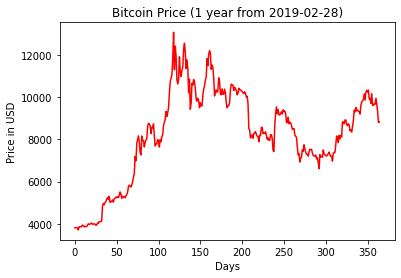

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f=open('/content/drive/MyDrive/bit_coin_folder/bit-coin.csv',encoding='cp949')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['종가']].to_numpy()
print('데이터 길이:',len(seq),'\n앞쪽 5개 값:',seq[0:5])

plt.plot(seq,color='red')
plt.title('Bitcoin Price (1 year from 2019-02-28)')
plt.xlabel('Days');plt.ylabel('Price in USD')
plt.show()

In [ ]:
def seq2dataset(seq,window,horizion):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizion)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizion-1])
        X.append(x); Y.append(y)
    return np.array(X),np.array(Y)

w=7
h=1

X,Y=seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0]); print(X[-1],Y[-1])

(358, 7, 1) (358, 1)
[[3816.6]
 [3821.9]
 [3823.1]
 [3809.5]
 [3715.9]
 [3857.2]
 [3863. ]] [3875.1]
[[9602.4]
 [9684.5]
 [9655.7]
 [9942.7]
 [9662.7]
 [9317.2]
 [8800.3]] [8818.6]


**프로그램 8-2**

(358, 7, 1) (358, 1)
[[3816.6]
 [3821.9]
 [3823.1]
 [3809.5]
 [3715.9]
 [3857.2]
 [3863. ]] [3875.1]
[[9602.4]
 [9684.5]
 [9655.7]
 [9942.7]
 [9662.7]
 [9317.2]
 [8800.3]] [8818.6]
Epoch 1/200
250/250 - 5s - loss: 1037.2017 - mae: 1037.2017 - val_loss: 346.4803 - val_mae: 346.4803 - 5s/epoch - 19ms/step
Epoch 2/200
250/250 - 2s - loss: 482.1639 - mae: 482.1639 - val_loss: 321.3612 - val_mae: 321.3612 - 2s/epoch - 7ms/step
Epoch 3/200
250/250 - 2s - loss: 513.6523 - mae: 513.6523 - val_loss: 620.6591 - val_mae: 620.6591 - 2s/epoch - 7ms/step
Epoch 4/200
250/250 - 2s - loss: 543.8778 - mae: 543.8778 - val_loss: 749.9607 - val_mae: 749.9607 - 2s/epoch - 7ms/step
Epoch 5/200
250/250 - 2s - loss: 476.5168 - mae: 476.5168 - val_loss: 294.9872 - val_mae: 294.9872 - 2s/epoch - 7ms/step
Epoch 6/200
250/250 - 2s - loss: 453.8267 - mae: 453.8267 - val_loss: 285.8004 - val_mae: 285.8004 - 2s/epoch - 7ms/step
Epoch 7/200
250/250 - 2s - loss: 460.7872 - mae: 460.7872 - val_loss: 276.2129 - val_mae: 

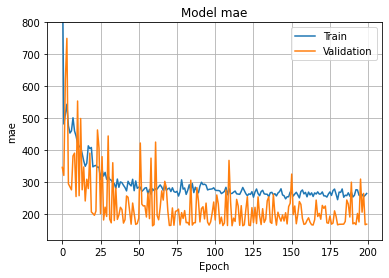

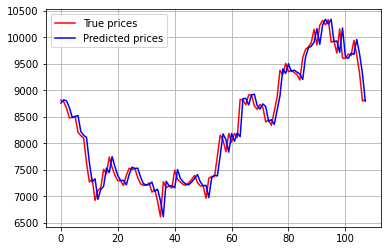

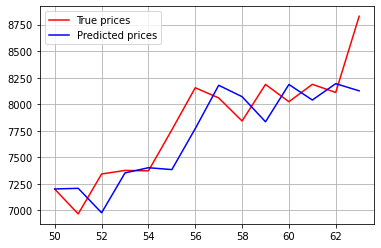

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f=open('/content/drive/MyDrive/bit_coin_folder/bit-coin.csv',encoding='cp949')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['종가']].to_numpy()

def seq2dataset(seq,window,horizion):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizion)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizion-1])
        X.append(x); Y.append(y)
    return np.array(X),np.array(Y)

w=7
h=1

X,Y=seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0]); print(X[-1],Y[-1])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range],color='red')
plt.plot(x_range,pred[x_range],color='blue')
plt.legend(['True prices','Predicted prices'],loc='best')
plt.grid()
plt.show()

x_range=range(50,64)
plt.plot(x_range,y_test[x_range],color='red')
plt.plot(x_range,pred[x_range],color='blue')
plt.legend(['True prices','Predicted prices'],loc='best')
plt.grid()
plt.show()

**프로그램 8-3**

(358, 7, 4) (358, 4)
[[3816.6 3814.6 3883.7 3783.3]
 [3821.9 3816.7 3855.8 3816.4]
 [3823.1 3821.9 3843.2 3783.6]
 [3809.5 3823.2 3836.6 3789.7]
 [3715.9 3809.7 3828.4 3681.8]
 [3857.2 3715.9 3873.2 3705.7]
 [3863.  3857.2 3887.3 3816.7]] [3875.1 3863.1 3907.4 3847.9]
Epoch 1/200
250/250 - 3s - loss: 2792.7737 - mae: 2792.7737 - val_loss: 303.5300 - val_mae: 303.5300 - 3s/epoch - 11ms/step
Epoch 2/200
250/250 - 2s - loss: 563.9702 - mae: 563.9702 - val_loss: 464.8192 - val_mae: 464.8192 - 2s/epoch - 7ms/step
Epoch 3/200
250/250 - 2s - loss: 503.9054 - mae: 503.9054 - val_loss: 323.7162 - val_mae: 323.7162 - 2s/epoch - 7ms/step
Epoch 4/200
250/250 - 2s - loss: 539.7918 - mae: 539.7918 - val_loss: 1171.7972 - val_mae: 1171.7972 - 2s/epoch - 7ms/step
Epoch 5/200
250/250 - 2s - loss: 514.3744 - mae: 514.3744 - val_loss: 305.7048 - val_mae: 305.7048 - 2s/epoch - 7ms/step
Epoch 6/200
250/250 - 2s - loss: 471.7333 - mae: 471.7333 - val_loss: 327.6738 - val_mae: 327.6738 - 2s/epoch - 7ms/step


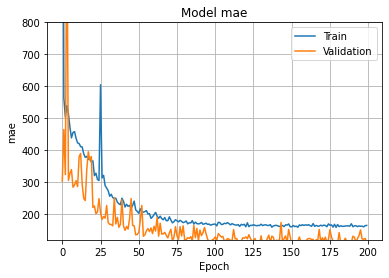

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f=open('/content/drive/MyDrive/bit_coin_folder/bit-coin.csv',encoding='cp949')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['종가','오픈','고가','저가']].to_numpy()

def seq2dataset(seq,window,horizion):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizion)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizion-1])
        X.append(x); Y.append(y)
    return np.array(X),np.array(Y)

w=7
h=1

X,Y=seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

pred=model.predict(x_test)
print("LSTM 평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
